In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

from  bs4 import BeautifulSoup
from selenium import webdriver
import time

import warnings
warnings.filterwarnings('ignore')

import string, nltk, re
from konlpy.tag import Okt
from wordcloud import WordCloud

from PIL import Image
from wordcloud import ImageColorGenerator

import os
driver_name =  os.environ['HOMEDRIVE'] + os.environ['HOMEPATH'] + '\\Downloads\\chromedriver_win32\\chromedriver.exe'

### 네이버 헤드라인 뉴스 워드클라우드 만들기

In [28]:
# 네이버 경제 헤드라인 뉴스
url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101#&date=%2000:00:00&page=1"

In [3]:
options = webdriver.ChromeOptions() # 화면없이
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument("--single-process")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36")

url1 = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1="
url2 = "#&date=%2000:00:00&page=1"
driver_name =  os.environ['HOMEDRIVE'] + os.environ['HOMEPATH'] + '\\Downloads\\chromedriver_win32\\chromedriver.exe'

url = url1 + '100' + url2

driver = webdriver.Chrome(driver_name, options=options)
try:
    driver.get(url)
    time.sleep(2)
except:
    print("excep error1")
    driver.quit()
    

In [ ]:
driver.quit()

In [40]:
driver = webdriver.Chrome(driver_name)
driver.get(url)
time.sleep(2)

soup = BeautifulSoup(driver.page_source, "html")

news_url = []
# 헤드라인 뉴스 목록
head_lis = soup.select('.section_headline > ul > li')
for hli in head_lis :
    news_url.append(hli.select_one('.sh_text > a')['href'])
    
# 나머지 추가 뉴스 목록
sec_lis = soup.select('.section_body > ul > li')
for sli in sec_lis:
    news_url.append(sli.select_one('dt > a')['href'])

# 세부 기사 가져오기
news = ''
for nurl in news_url[:1]:    
    driver.get(nurl)
    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, 'html')

    title = soup.select_one('.media_end_head_headline').text
    desc = soup.select_one('#dic_area').get_text(separator=' ', strip=True) # separator 해 주면 <br>등의 태그들이 들어간 자리를 띄어쓰기 해 준다.
    news += title + ' ' + desc + ' '

driver.close()


In [44]:
print(news)

금호피앤비화학 "재활용 플라스틱 개발 본격화" 금호피앤비화학 김포연구소 전경. 금호석유화학 제공 [파이낸셜뉴스] 금호피앤비화학은 한국재료연구원과 ‘재활용 가능한 열경화성 수지 제조기술’ 특허 및 기술실시권 계약 체결을 통해 재활용 플라스틱 개발을 본격화한다고 23일 밝혔다. 열경화성 수지는 재료에 열을 가해 경화 성형을 하면 다시 열을 가해도 이전 형태로 돌아가지 않는 수지다. 가벼우면서 기계적 특성과 재료의 가공성이 우수해 여러 산업분야에 광범위하게 사용되지만 사용 후 분해가 어려워 매립이나 소각 등의 방법으로 폐기하고 있다. 금호피앤비화학은 이번에 이전되는 기술을 적용하면 열경화성 수지의 기본 물성을 그대로 유지하면서 수분해 기반의 분해 처리가 가능해져 매립이나 소각 등의 폐기 방법을 사용하지 않아도 된다고 예측한다. 또 분해 이후 제품을 에폭시 수지나 탄소섬유 등의 원재료로 재활용할 수 있어 전 과정 평과( LCA ) 기반의 자원 순환 경제에도 기여할 수 있을 것으로 기대한다. 금호피앤비화학은 이 기술을 최근 유럽연합( EU ) 회원국을 중심으로 강화되고 있는 풍력 터빈에 대한 환경규제에 발맞춰 재활용 가능한 블레이드용 에폭시 수지에 적용할 계획이다. 향후 차량용 수소저장용기 등 다양한 복합소재로 활용 영역을 넓혀 갈 예정이다. 신우성 금호피앤비화학 대표는 “금호피앤비화학은 에폭시 수지 사업영역의 지속 가능한 발전을 위하여 바이오원료 및 업사이클링 기술을 적극 활용하겠다"며 "향후 친환경 복합소재 선도기업으로 자리매김할 것”이라고 말했다. 


In [45]:
# 한글과 영어도 같이 추출할 수 있는 것이 없어서 따로따로 분리 한다.
desc_ko, desc_eng = '', ''
desc_ko = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', news)
desc_eng = re.sub('[^A-Za-z]', ' ', news)    

In [47]:
# 불용어 정리 
with open('../static/data/한글불용어.txt') as st:
    lines = st.readlines()
stop_words = [line.strip() for line in lines]


In [48]:
# 한글 문장에서 명사 추출
# 문제점 영문이 모두 제거된다.
okt = Okt()
tokens = okt.nouns(desc_ko)
tokens =  [ word for word in tokens if word not in stop_words]

In [49]:
# 영문 문장 추출
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words_eng = stopwords.words('english')
tokens_eng = word_tokenize(desc_eng)
tokens_eng = [word for word in tokens_eng if word.lower() not in stop_words_eng and len(word) > 1]
tokens_eng


['LCA', 'EU']

In [50]:
# 영문과 한글 합치기
tokens.extend(tokens_eng)

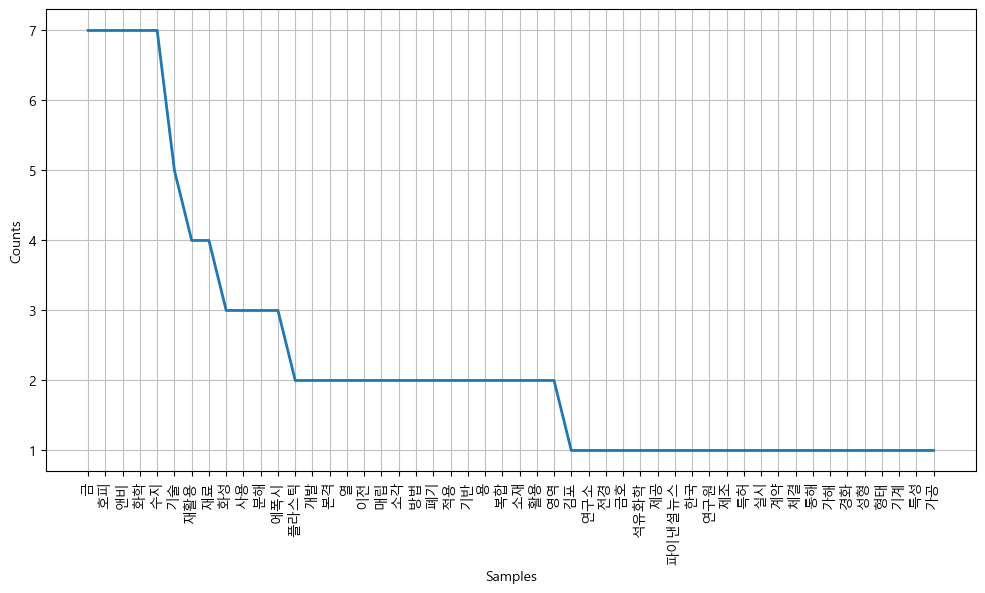

In [51]:

news = nltk.Text(tokens, name="네이버 뉴스")
plt.figure(figsize=(12, 6))
news.plot(50)
plt.show()

In [52]:
# 가장 많이 나오는 단어 5개
data = news.vocab().most_common(5)
data

[('금', 7), ('호피', 7), ('앤비', 7), ('화학', 7), ('수지', 7)]

In [53]:
from PIL import Image
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('../static/img/data_science1.jpg'))
image_colors = ImageColorGenerator(mask)

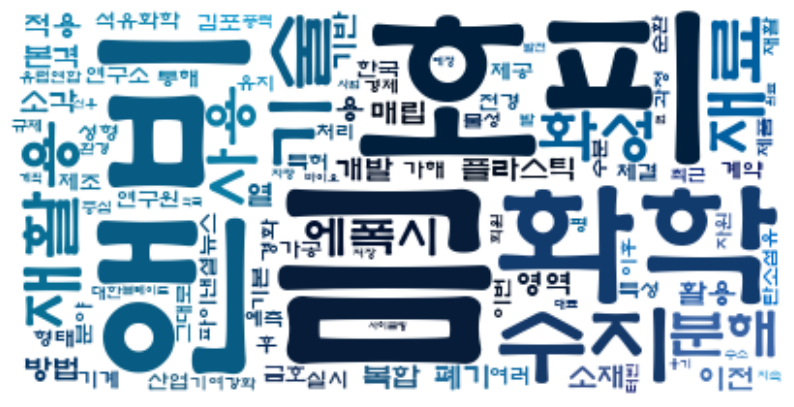

In [54]:
# 워드 클라우드 그리기
wc = WordCloud(
    background_color='white', 
    random_state=2023,
    font_path='C:/Windows/Fonts/HMFMOLD.TTF'
).generate_from_frequencies(dict(news.vocab().most_common(100)))

plt.figure(figsize=(10, 6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
# plt.show()
plt.savefig('../static/img/test.jpg', bbox_inches='tight', pad_inches=0.1 )

### txt 파일 테스트 해 보기

In [43]:
with open('../static/upload/어린이날 선물.txt') as f:
    desc = f.read()
desc = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', desc)
desc

'어린이 날 선물로는 다양한 것이 있지만  아래와 같은 것들이 추천됩니다       책   아이들에게 독서 습관을 길러줄 수 있는 좋은 선물입니다       스포츠 용품   아이들이 좋아하는 운동에 필요한 용품을 선물해줄 수 있습니다       취미용품   아이들이 즐겨하는 취미 활동에 필요한 용품을 선물해줄 수 있습니다   예  미술용품  악기 등       게임   아이들에게 재미와 즐거움을 줄 수 있는 게임을 선물해줄 수 있습니다   예  보드게임  비디오 게임 등    다만  각 아이의 취향과 성향에 따라 선물이 달라질 수 있으므로  상황에 맞게 선택해주시면 좋을 것 같습니다          게임기가 있다면 게임칩이나 여자아이면 인형  좋아하는 아이돌 앨범 만화책  옷  펜 시계 에어팟케이스 가격대별로 선물은 천차만별입니다  아래 가격대별 어린이날 선물 참고해보시기 바랍니다    자전거나 중학교 가기 전 옷 한벌 추천드립니다     초 이면 남자아이던 여자아이던 무조건 아이돌을 좋아할겁니다   뭐 프사나 그런것들 봐서아이돌 덕질템    응원봉   앨범 사주시는건 어떤가요  어린이 날 선물로는 다양한 것이 있지만  아래와 같은 것들이 추천됩니다       책   아이들에게 독서 습관을 길러줄 수 있는 좋은 선물입니다       스포츠 용품   아이들이 좋아하는 운동에 필요한 용품을 선물해줄 수 있습니다       취미용품   아이들이 즐겨하는 취미 활동에 필요한 용품을 선물해줄 수 있습니다   예  미술용품  악기 등       게임   아이들에게 재미와 즐거움을 줄 수 있는 게임을 선물해줄 수 있습니다   예  보드게임  비디오 게임 등    다만  각 아이의 취향과 성향에 따라 선물이 달라질 수 있으므로  상황에 맞게 선택해주시면 좋을 것 같습니다          게임기가 있다면 게임칩이나 여자아이면 인형  좋아하는 아이돌 앨범 만화책  옷  펜 시계 에어팟케이스 가격대별로 선물은 천차만별입니다  아래 가격대별 어린이날 선물 참고해보시기 바랍니다   

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords.words('english')

In [82]:
stop_words = '어린이날 선물 추천 코인 테크 포인트 alice and me'
# 사용자 입력 불용어 처리
sword = []
sword_ko, sword_en = [], []
if stop_words !='':
    for word in stop_words.split():
        if word == '': continue
        if re.search('[ㄱ-ㅎㅏ-ㅣ가-힣]', word):
            sword_ko.append(word)   # 한글 
        else:
            sword_en.append(word)   # 영어
sword_ko, sword_en

(['어린이날', '선물', '추천', '코인', '테크', '포인트'], ['alice', 'and', 'me'])

In [ ]:
fname = '../static/data/한글불용어.txt'
with open(fname) as f:
    lines = f.readlines()
sword_ko.extend([line.strip() for line in lines])
sword_ko

In [ ]:
sword_en.extend(stopwords.words('english'))
sword_en

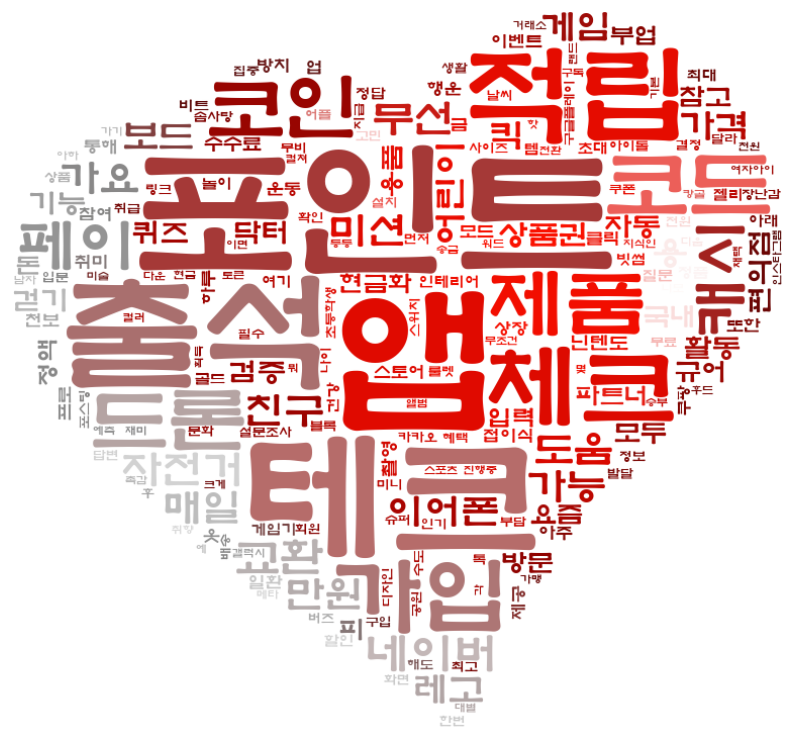

In [67]:
# 한글 명사 분석
okt = Okt()
tokens = okt.nouns(desc)
tokens = [word for word in tokens if word not in sword]

texts = nltk.Text(tokens, '한글 워드클라우드')

mask = np.array(Image.open('../static/img/heart.jpg'))
image_colors = ImageColorGenerator(mask)

# 워드 클라우드 그리기
fname = '../static/img/word_text.png'
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/windows/fonts/HMFMOLD.TTF',
    mask=mask
).generate_from_frequencies(dict(texts.vocab().most_common(300)))

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()
# plt.savefig(fname, bbox_inches='tight', pad_inches=0.1)

##### 1. mask 알아보기
    mask.ndim 이 3 이면 색상 있는 이미지, 2 이면 흑백 이미지

In [26]:
mask = np.array(Image.open('../static/img/Alice_mask.png'))
mask.ndim

2

In [27]:
mask = np.array(Image.open('../static/img/heart.jpg'))
mask.ndim

3

In [28]:
mask = np.array(Image.open('../static/img/show.png'))
mask.ndim


3

In [92]:
import requests
from urllib.parse import quote
from datetime import datetime

info_url = 'https://www.genie.co.kr/detail/albumInfo?axnm='
base_url = 'https://www.genie.co.kr/chart/top200?ditc=D'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

now = datetime.now()
ymd = now.strftime('%Y%m%d')
hh = now.strftime('%H')

lines = []

for page in range(1, 2):
    url = f'{base_url}&ymd={ymd}&hh={hh}&rtm=Y&pg={page}'
   
    result = requests.get(url, headers=header)


    soup = BeautifulSoup(result.text, 'html.parser')

    trs = soup.select('tr.list')

    for tr in trs:
        
        rank = tr.select_one('.number').get_text().split('\n')[0].strip()
        href = info_url + tr.select_one('.cover')['onclick'].split('\'')[1]
        print(href)
        img = 'http:' + tr.select_one('.cover > img')['src']
        title = tr.select_one('.title.ellipsis').get_text().split('\n')[-1].strip()
        artist = tr.select_one('.artist.ellipsis').string.strip()
        album = tr.select_one('.albumtitle.ellipsis').text.strip()
        lines.append({'rank':rank, 'title':title, 'artist':artist, 'album':album, 'img':img, 'href': href})



https://www.genie.co.kr/detail/albumInfo?axnm=83810194
https://www.genie.co.kr/detail/albumInfo?axnm=83665559
https://www.genie.co.kr/detail/albumInfo?axnm=83793925
https://www.genie.co.kr/detail/albumInfo?axnm=83779626
https://www.genie.co.kr/detail/albumInfo?axnm=83665559
https://www.genie.co.kr/detail/albumInfo?axnm=83779626
https://www.genie.co.kr/detail/albumInfo?axnm=82842800
https://www.genie.co.kr/detail/albumInfo?axnm=82322594
https://www.genie.co.kr/detail/albumInfo?axnm=83325577
https://www.genie.co.kr/detail/albumInfo?axnm=83687323
https://www.genie.co.kr/detail/albumInfo?axnm=82614128
https://www.genie.co.kr/detail/albumInfo?axnm=82638032
https://www.genie.co.kr/detail/albumInfo?axnm=83883344
https://www.genie.co.kr/detail/albumInfo?axnm=83748133
https://www.genie.co.kr/detail/albumInfo?axnm=82912984
https://www.genie.co.kr/detail/albumInfo?axnm=82638032
https://www.genie.co.kr/detail/albumInfo?axnm=81410156
https://www.genie.co.kr/detail/albumInfo?axnm=82638032
https://ww